In [26]:
from src.data_help.read_data import read_haberman_dataset
from src.data_help.synthetic_data_generator import generate_synthetic_data
from src.LogRegCCD import LogRegCCD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def convert_beta_string_to_list(beta_str):
    try:
        # Remove single quotes and leading/trailing whitespace
        beta_str = beta_str.strip("'")
        # Convert string representation of array to numpy array
        beta_array = np.fromstring(beta_str.strip('[]'), sep=' ')
        return beta_array.tolist()  # Convert numpy array to Python list
    except:
        # In case of any parsing errors
        return []
    
def convert_sklearn_beta_to_list(beta_str):
    try:
        # Remove surrounding quotes
        beta_str = beta_str.strip("'")
        # Replace newlines with spaces
        beta_str = beta_str.replace('\n', ' ')
        # Remove the outer square brackets (there are two at the beginning and two at the end)
        beta_str = beta_str.strip('[]')
        # Convert to list of floats
        beta_list = [float(x) for x in beta_str.split()]
        return beta_list
    except Exception as e:
        print(f"Error converting: {e}")
        return []

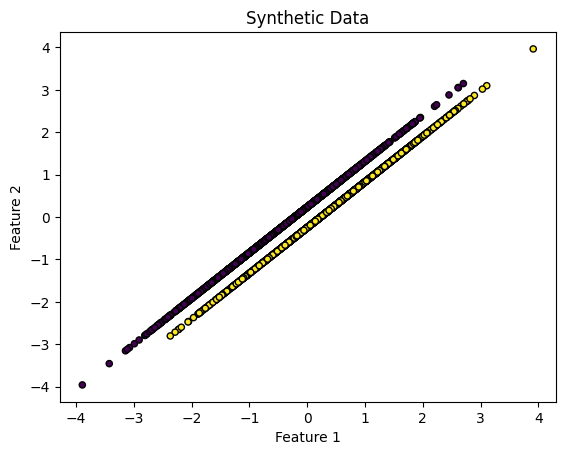

In [105]:
X, y = generate_synthetic_data(p=0.5, n=5000, d=2, g=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2871)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot scatter X
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=20)
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

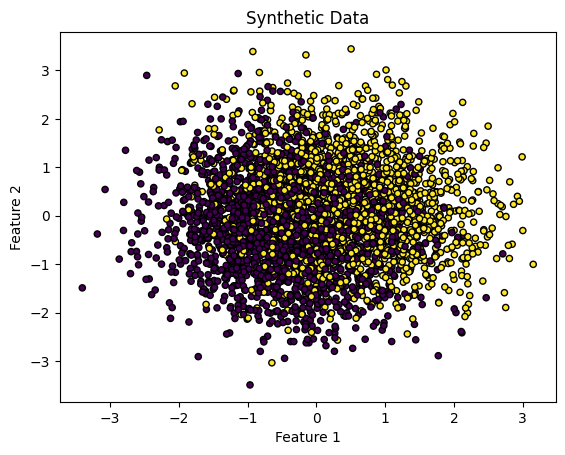

In [24]:
X, y = generate_synthetic_data(p=0.5, n=5000, d=2, g=-0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2871)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot scatter X
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=20)
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Ideas:
- p = 0.5, g = 0
    - n different 
    - n >> d (n = 100-1000, d = 16)
    - n << d (n = 100, d = 100, 200, 300, 400, 500)
- n = 1000, d = 32
    - p = 0.05, p = 0.5, p = 0.95
    - g = -1, 0, 1
- lambda = 0 (default n1000,p0.5,d=32,g=0/0.5)


0.001000     489
10.000000    243
3.593814      83
1.291550      40
0.464159      18
0.166810      12
0.059948      10
0.002783       3
0.021544       2
Name: lambda, dtype: int64


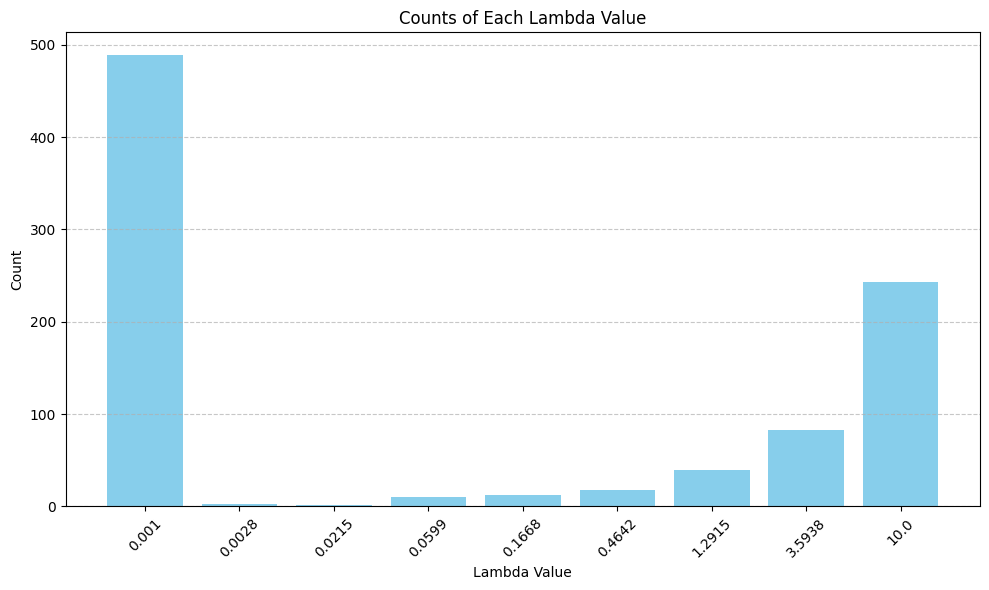

In [127]:
data = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD[n grt d]_single.csv")
# Count lambda

lambda_counts = data['lambda'].value_counts()
print(lambda_counts)
# Round lambda values to 4 decimal places
lambda_counts.index = np.round(lambda_counts.index, 4)

# Convert to DataFrame for easier sorting
lambda_df = pd.DataFrame({'lambda': lambda_counts.index, 'count': lambda_counts.values})

# Sort by lambda values numerically
lambda_df = lambda_df.sort_values('lambda')

# Plot the counts of each lambda value with sorted x-axis
plt.figure(figsize=(10, 6))
plt.bar(lambda_df['lambda'].astype(str), lambda_df['count'], color='skyblue')
plt.xlabel('Lambda Value')
plt.ylabel('Count')
plt.title('Counts of Each Lambda Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Non-correlated

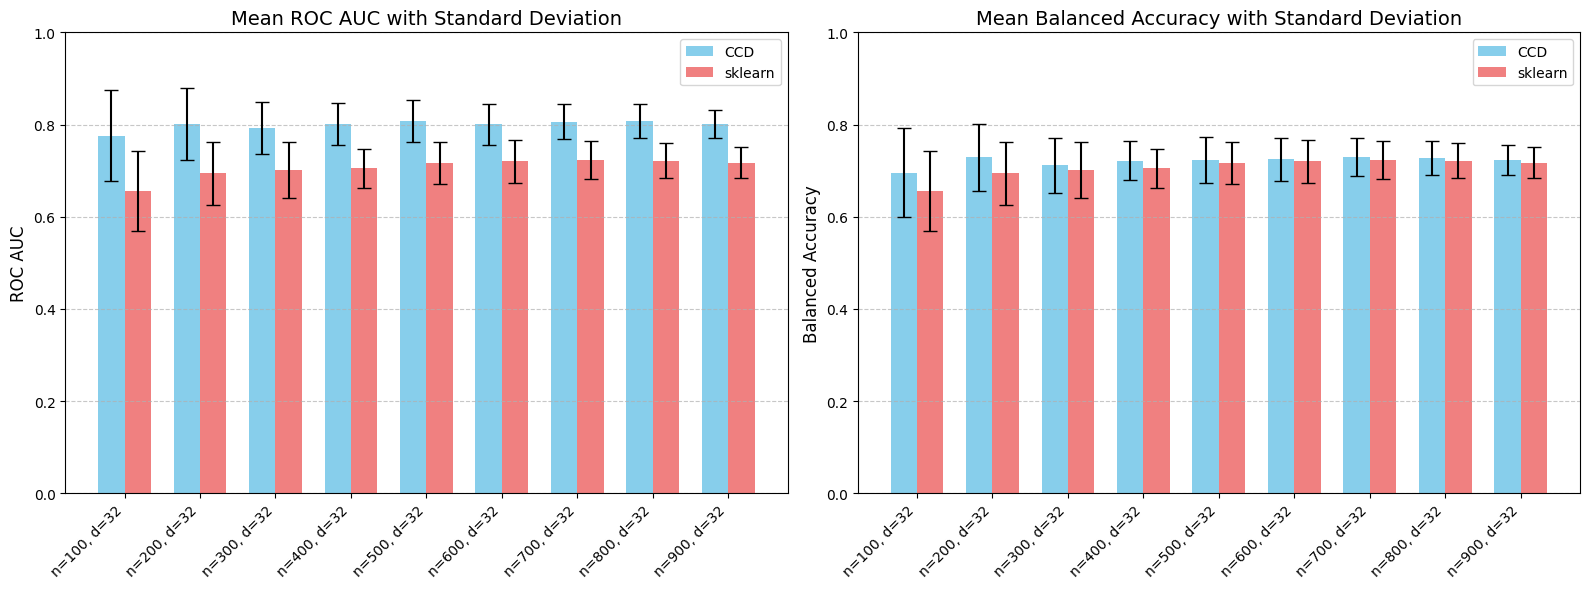

In [40]:
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD[n grt d]_single.csv")
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn[n grt d]_single.csv")
data_n_sklearn['Iterations'] = data_n_sklearn['Iterations'].apply(lambda x: int(x.strip('[]')))

# Graph the mean for roc_auc and balanced_accuracy for each n and d combination for CCD and sklearn and mark the standard deviation with error bars

# grouped_sklearn = data_n_sklearn.groupby(['n', 'd']).agg({
#     'Roc_Auc': ['mean', 'std'],
#     'Balanced Accuracy': ['mean', 'std'],
#     'Iterations': ['mean', 'std']
# }).reset_index()
data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 0, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 0, :]

grouped_ccd = data_n_CCD.groupby(['n', 'd']).agg({
    'roc_auc': ['mean', 'std'],
    'balanced_accuracy': ['mean', 'std']
}).reset_index()

grouped_sklearn = data_n_sklearn.groupby(['n', 'd']).agg({
    'Roc_Auc': ['mean', 'std'],
    'Balanced Accuracy': ['mean', 'std']
}).reset_index().rename(columns={
    'Roc_Auc': 'roc_auc',
    'Balanced Accuracy': 'balanced_accuracy'
})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define bar positions
x = np.arange(len(grouped_ccd))
width = 0.35  # Width of bars

# ROC AUC plot
axes[0].bar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
         width, label='CCD', color='skyblue')
axes[0].bar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[0].errorbar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
               yerr=grouped_ccd[('roc_auc', 'std')], fmt='none', color='black', capsize=5)
axes[0].errorbar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
               yerr=grouped_sklearn[('roc_auc', 'std')], fmt='none', color='black', capsize=5)

# Balanced accuracy plot
axes[1].bar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
         width, label='CCD', color='skyblue')
axes[1].bar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[1].errorbar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
               yerr=grouped_ccd[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)
axes[1].errorbar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
               yerr=grouped_sklearn[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)

# Create x-tick labels as "n=value, d=value"
labels = [f"n={n}, d={d}" for n, d in zip(grouped_ccd['n'], grouped_ccd['d'])]

# Set plot attributes for ROC AUC
axes[0].set_title('Mean ROC AUC with Standard Deviation', fontsize=14)
axes[0].set_ylabel('ROC AUC', fontsize=12)
axes[0].set_ylim(0, 1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Set plot attributes for balanced accuracy
axes[1].set_title('Mean Balanced Accuracy with Standard Deviation', fontsize=14)
axes[1].set_ylabel('Balanced Accuracy', fontsize=12)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

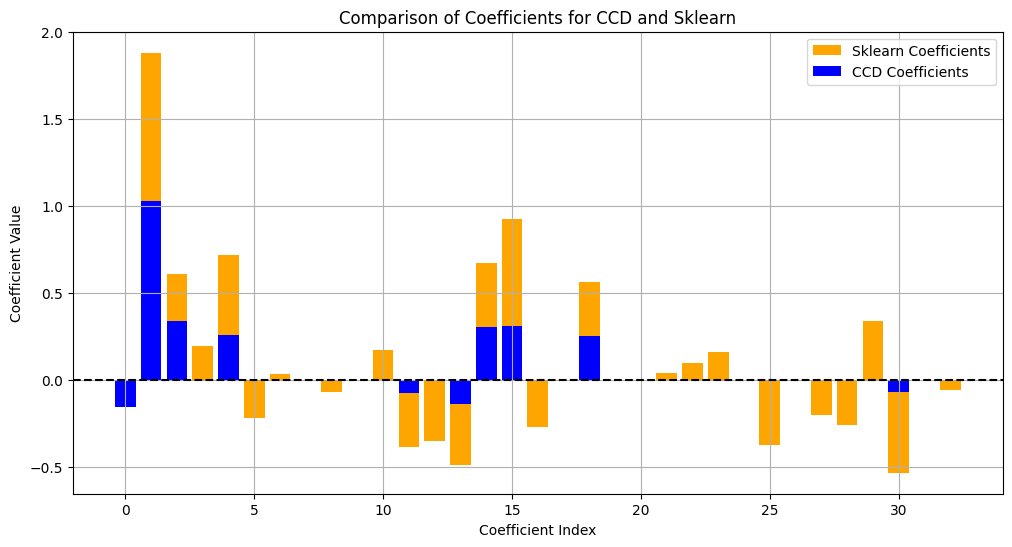

In [30]:
# Plot coefficients for CCD and sklearn for n=100, d=32, g=0
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD[n grt d]_single.csv")
data_n_CCD['beta'] = data_n_CCD['beta'].apply(convert_beta_string_to_list)
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn[n grt d]_single.csv")
data_n_sklearn['Betas'] = data_n_sklearn['Betas'].apply(convert_sklearn_beta_to_list)
data_n_sklearn['Intercept'] = data_n_sklearn['Intercept'].apply(lambda x: float(x.strip('[]')))

data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 0, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 0, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['n'] == 100, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['d'] == 32, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['n'] == 100, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['d'] == 32, :]

# Get the coefficients for CCD and sklearn
ccd_betas = data_n_CCD['beta'].values[0]
ccd_intercept = data_n_CCD['intercept'].values[0]
# merge intercept and betas into one array
ccd_betas = np.concatenate(([ccd_intercept], ccd_betas))

sklearn_betas = data_n_sklearn['Betas'].values[0]
sklearn_intercept = data_n_sklearn['Intercept'].values[0]
sklearn_betas = np.concatenate(([sklearn_intercept], sklearn_betas))

# Create a bar plot for the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sklearn_betas)), sklearn_betas, alpha=1, label='Sklearn Coefficients', color='orange')
plt.bar(range(len(ccd_betas)), ccd_betas, alpha=1, label='CCD Coefficients', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Comparison of Coefficients for CCD and Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()
plt.show()

# Correlated

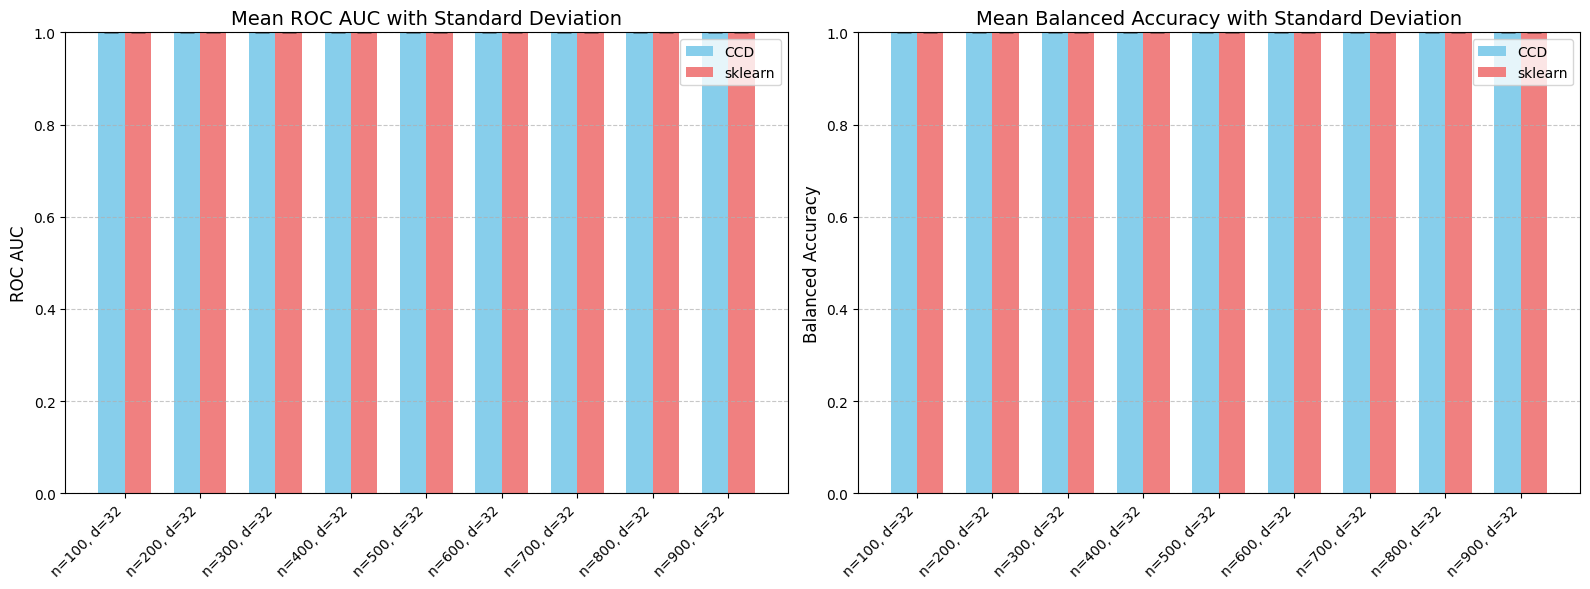

In [106]:
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD[n grt d]_single.csv")
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn[n grt d]_single.csv")
data_n_sklearn['Iterations'] = data_n_sklearn['Iterations'].apply(lambda x: int(x.strip('[]')))

data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 1, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 1, :]

grouped_ccd = data_n_CCD.groupby(['n', 'd']).agg({
    'roc_auc': ['mean', 'std'],
    'balanced_accuracy': ['mean', 'std']
}).reset_index()

grouped_sklearn = data_n_sklearn.groupby(['n', 'd']).agg({
    'Roc_Auc': ['mean', 'std'],
    'Balanced Accuracy': ['mean', 'std']
}).reset_index().rename(columns={
    'Roc_Auc': 'roc_auc',
    'Balanced Accuracy': 'balanced_accuracy'
})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define bar positions
x = np.arange(len(grouped_ccd))
width = 0.35  # Width of bars

# ROC AUC plot
axes[0].bar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
         width, label='CCD', color='skyblue')
axes[0].bar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[0].errorbar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
               yerr=grouped_ccd[('roc_auc', 'std')], fmt='none', color='black', capsize=5)
axes[0].errorbar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
               yerr=grouped_sklearn[('roc_auc', 'std')], fmt='none', color='black', capsize=5)

# Balanced accuracy plot
axes[1].bar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
         width, label='CCD', color='skyblue')
axes[1].bar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[1].errorbar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
               yerr=grouped_ccd[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)
axes[1].errorbar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
               yerr=grouped_sklearn[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)

# Create x-tick labels as "n=value, d=value"
labels = [f"n={n}, d={d}" for n, d in zip(grouped_ccd['n'], grouped_ccd['d'])]

# Set plot attributes for ROC AUC
axes[0].set_title('Mean ROC AUC with Standard Deviation', fontsize=14)
axes[0].set_ylabel('ROC AUC', fontsize=12)
axes[0].set_ylim(0, 1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Set plot attributes for balanced accuracy
axes[1].set_title('Mean Balanced Accuracy with Standard Deviation', fontsize=14)
axes[1].set_ylabel('Balanced Accuracy', fontsize=12)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

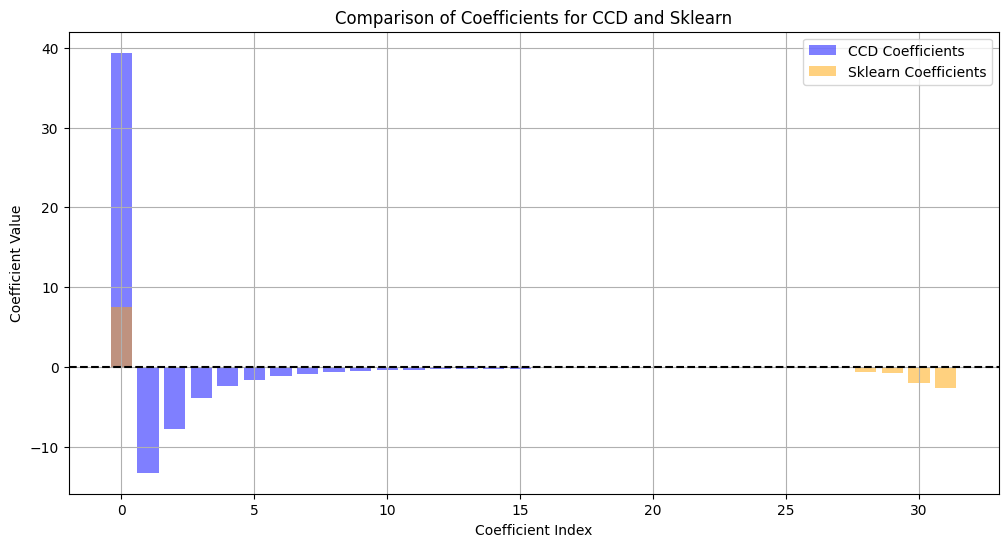

CCD Betas: [39.37396575, -13.24128913, -7.80508693, -3.91992882, -2.3516393, -1.56612003, -1.11736025, -0.83711575, -0.6504642, -0.51993821, -0.42509258, -0.35401861, -0.29938551, -0.2564895, -0.22219275, -0.19434094, -0.17141769, -0.15232245, -0.13624803, -0.12259223, -0.11088941, -0.10078552, -0.09200336, -0.08432108, -0.07756142, -0.07158323, -0.06627139, -0.0615285, -0.05727746, -0.05345263, -0.04999817, -0.04686983]
CCD Intercept: -1.349444719320186
Sklearn Betas: [7.46819677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.60887306, -0.81031708, -2.05906516, -2.66525237]
Sklearn Intercept: -0.27803424


In [107]:
# Plot coefficients for CCD and sklearn for n=900, d=32, g=1
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD[n grt d]_single.csv")
data_n_CCD['beta'] = data_n_CCD['beta'].apply(convert_beta_string_to_list)
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn[n grt d]_single.csv")
data_n_sklearn['Betas'] = data_n_sklearn['Betas'].apply(convert_sklearn_beta_to_list)
data_n_sklearn['Intercept'] = data_n_sklearn['Intercept'].apply(lambda x: float(x.strip('[]')))

data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 1, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 1, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['n'] == 100, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['d'] == 32, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['n'] == 100, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['d'] == 32, :]

# Get the coefficients for CCD and sklearn
ccd_betas = data_n_CCD['beta'].values[0]
sklearn_betas = data_n_sklearn['Betas'].values[0]
sklearn_intercept = data_n_sklearn['Intercept'].values[0]
ccd_intercept = data_n_CCD['intercept'].values[0]

# Create a bar plot for the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(ccd_betas)), ccd_betas, alpha=0.5, label='CCD Coefficients', color='blue')
plt.bar(range(len(sklearn_betas)), sklearn_betas, alpha=0.5, label='Sklearn Coefficients', color='orange')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Comparison of Coefficients for CCD and Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()
plt.show()

# Print betas and intercepts
print("CCD Betas:", ccd_betas)
print("CCD Intercept:", ccd_intercept)
print("Sklearn Betas:", sklearn_betas)
print("Sklearn Intercept:", sklearn_intercept)


# Lambda = 0

c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[-1.45637833e+00  6.03070976e+01 -2.68821697e+01 -9.56785827e+00
 -4.86123777e+00 -2.93443545e+00 -1.96179631e+00 -1.40335514e+00
 -1.05339768e+00 -8.19722646e-01 -6.55982160e-01 -5.36818961e-01
 -4.47404999e-01 -3.78603540e-01 -3.24534007e-01 -2.81269114e-01
 -2.46115413e-01 -2.17162093e-01 -1.93031547e-01 -1.72711058e-01
 -1.55438023e-01 -1.40634064e-01 -1.27844887e-01 -1.16727893e-01
 -1.06999433e-01 -9.84357050e-02 -9.08646705e-02 -8.41300041e-02
 -7.81225846e-02 -7.27313435e-02 -6.78826427e-02 -6.35007270e-02
 -5.95328834e-02] -1.456378325387483
[-2.58311999 30.09666556 14.24093432  8.19300424  5.05808124  3.14790083
  1.86391871  0.94218179  0.24858011 -0.29215411 -0.72549007 -1.08050735
 -1.37666308 -1.62746658 -1.84258961 -2.02913559 -2.19244361 -2.3365992
 -2.46478298 -2.57950968 -2.68279207 -2.77626186 -2.86125139 -2.93886684
 -3.01002732 -3.07550402 -3.13595446 -3.1919328  -3.24392115 -3.29232799
 -3.33751311 -3.37978616 -3.41942194] -2.583119987961767
[-1.01099697 26.529049

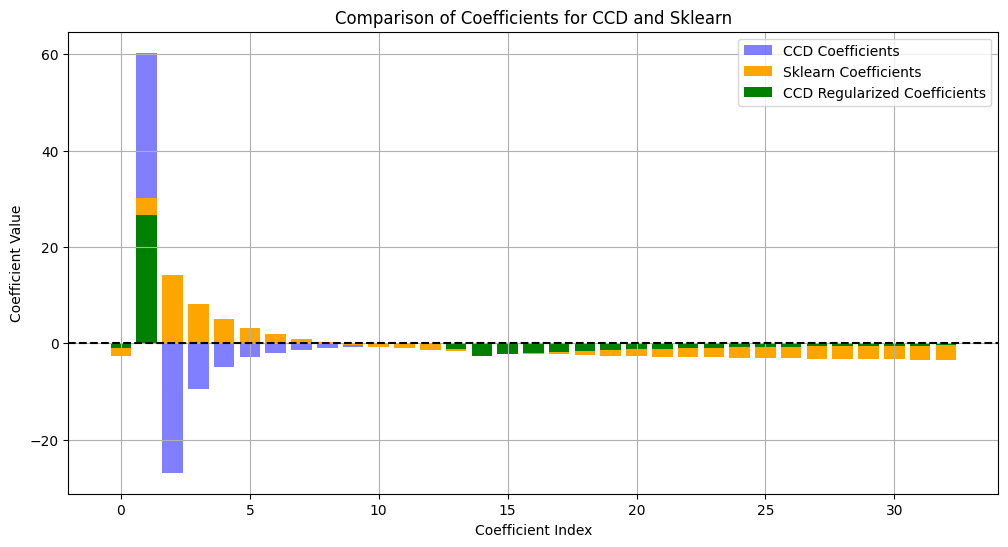

In [ ]:
data_synth = generate_synthetic_data(p=0.5, n=200, d=32, g=1)
X_train, X_test, y_train, y_test = train_test_split(data_synth[0], data_synth[1], test_size=0.2, random_state=2871)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogRegCCD(lambda_vals=[0], max_iter=1000, stop_tol=1e-5)
model.fit(X_train, y_train)
model.validate_all(X_test, y_test)

from sklearn.linear_model import LogisticRegression
model_sklearn = LogisticRegression(penalty='none', max_iter=1000, tol=1e-5)
model_sklearn.fit(X_train, y_train)

model_regularized = LogRegCCD(lambda_vals=[0.001], max_iter=1000, stop_tol=1e-5)
model_regularized.fit(X_train, y_train)
model_regularized.validate_all(X_test, y_test)

ccd_betas = model.results['beta'].values[0]
ccd_intercept = model.results['intercept'].values[0]
ccd_betas = np.concatenate(([ccd_intercept], ccd_betas))
sklearn_betas = model_sklearn.coef_[0]
sklearn_intercept = model_sklearn.intercept_[0]
sklearn_betas = np.concatenate(([sklearn_intercept], sklearn_betas))
ccd_reg_betas = model_regularized.results['beta'].values[0]
ccd_reg_intercept = model_regularized.results['intercept'].values[0]
ccd_reg_betas = np.concatenate(([ccd_reg_intercept], ccd_reg_betas))
print(ccd_betas, ccd_intercept)
print(sklearn_betas, sklearn_intercept)
print(ccd_reg_betas, ccd_reg_intercept)
plt.figure(figsize=(12, 6))
plt.bar(range(len(ccd_betas)), ccd_betas, alpha=0.5, label='CCD Coefficients', color='blue')
plt.bar(range(len(sklearn_betas)), sklearn_betas, alpha=1, label='Sklearn Coefficients', color='orange')
plt.bar(range(len(ccd_reg_betas)), ccd_reg_betas, alpha=1, label='CCD Regularized Coefficients', color='green')
plt.bar
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Comparison of Coefficients for CCD and Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()
plt.show()

In [10]:
display(model.results[['roc_auc', 'balanced_accuracy', 'pr_auc', 'f1']])
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, balanced_accuracy_score
# sklearn metrics
y_pred = model_sklearn.predict(X_test)
y_pred_proba = model_sklearn.predict_proba(X_test)[:, 1]
print("Sklearn ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Sklearn Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Sklearn PR AUC:", average_precision_score(y_test, y_pred_proba))
print("Sklearn F1 Score:", f1_score(y_test, y_pred))

,roc_auc,balanced_accuracy,pr_auc,f1
0,1.0,1.0,1.0,1.0


Sklearn ROC AUC: 1.0
Sklearn Balanced Accuracy: 1.0
Sklearn PR AUC: 1.0
Sklearn F1 Score: 1.0


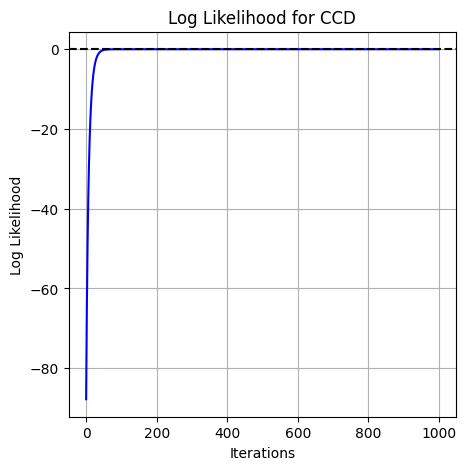

In [22]:
# Plot log likelihood for CCD
plt.figure(figsize=(5, 5))
plt.plot(model.results['log_likelihoods'][0], label='CCD Log Likelihood', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Log Likelihood for CCD')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.grid()
plt.show()

# Coefficients (iterations)

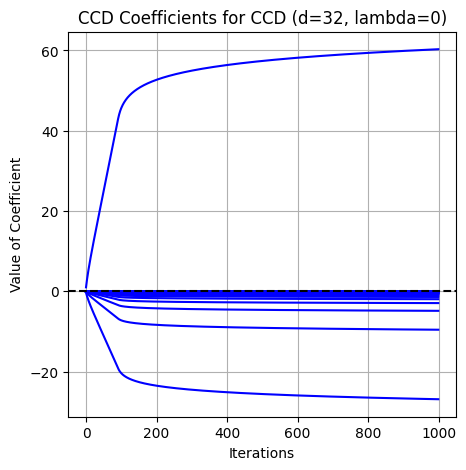

In [19]:
# Plot log likelihood for CCD
plt.figure(figsize=(5, 5))
plt.plot(model.results['betas'][0], label='CCD Coefficients', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('CCD Coefficients for CCD (d=32, lambda=0)')
plt.xlabel('Iterations')
plt.ylabel('Value of Coefficient')
plt.grid()
plt.show()

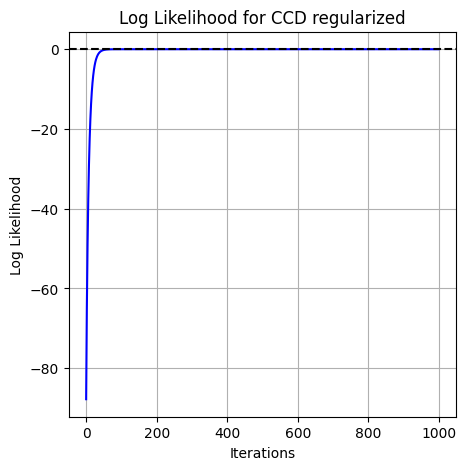

In [21]:
# Plot log likelihood for CCD
plt.figure(figsize=(5, 5))
plt.plot(model_regularized.results['log_likelihoods'][0], label='CCD Log Likelihood', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Log Likelihood for CCD regularized')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.grid()
plt.show()

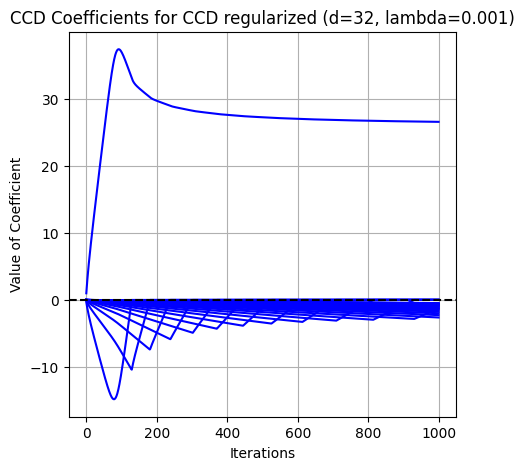

In [ ]:
# Plot log likelihood for CCD
plt.figure(figsize=(5, 5))
plt.plot(model_regularized.results['betas'][0], label='CCD Coefficients', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('CCD Coefficients for CCD regularized (d=32, lambda=0.001)')
plt.xlabel('Iterations')
plt.ylabel('Value of Coefficient')
plt.grid()
plt.show()

# Unbalanced
## Non-correlated

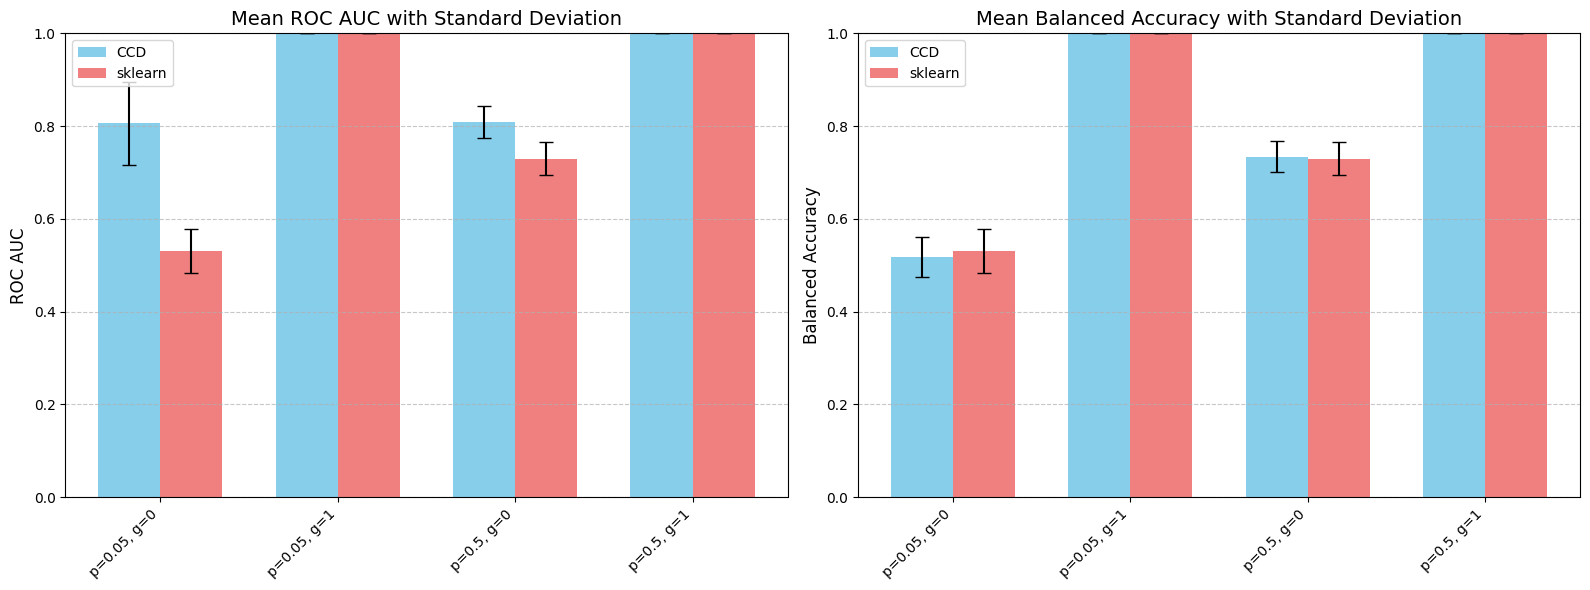

In [96]:
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD_unbalanced.csv")
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn_unbalanced.csv")
data_n_sklearn['Iterations'] = data_n_sklearn['Iterations'].apply(lambda x: int(x.strip('[]')))
# Graph the mean for roc_auc and balanced_accuracy for each n and d combination for CCD and sklearn and mark the standard deviation with error bars

# grouped_sklearn = data_n_sklearn.groupby(['n', 'd']).agg({
#     'Roc_Auc': ['mean', 'std'],
#     'Balanced Accuracy': ['mean', 'std'],
#     'Iterations': ['mean', 'std']
# }).reset_index()
# data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 0, :]
# data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 0, :]

grouped_ccd = data_n_CCD.groupby(['p', 'g']).agg({
    'roc_auc': ['mean', 'std'],
    'balanced_accuracy': ['mean', 'std']
}).reset_index()

grouped_sklearn = data_n_sklearn.groupby(['p', 'g']).agg({
    'Roc_Auc': ['mean', 'std'],
    'Balanced Accuracy': ['mean', 'std']
}).reset_index().rename(columns={
    'Roc_Auc': 'roc_auc',
    'Balanced Accuracy': 'balanced_accuracy'
})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define bar positions
x = np.arange(len(grouped_ccd))
width = 0.35  # Width of bars

# ROC AUC plot
axes[0].bar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
         width, label='CCD', color='skyblue')
axes[0].bar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[0].errorbar(x - width/2, grouped_ccd[('roc_auc', 'mean')], 
               yerr=grouped_ccd[('roc_auc', 'std')], fmt='none', color='black', capsize=5)
axes[0].errorbar(x + width/2, grouped_sklearn[('roc_auc', 'mean')], 
               yerr=grouped_sklearn[('roc_auc', 'std')], fmt='none', color='black', capsize=5)

# Balanced accuracy plot
axes[1].bar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
         width, label='CCD', color='skyblue')
axes[1].bar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
         width, label='sklearn', color='lightcoral')

# Add error bars
axes[1].errorbar(x - width/2, grouped_ccd[('balanced_accuracy', 'mean')], 
               yerr=grouped_ccd[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)
axes[1].errorbar(x + width/2, grouped_sklearn[('balanced_accuracy', 'mean')], 
               yerr=grouped_sklearn[('balanced_accuracy', 'std')], fmt='none', color='black', capsize=5)

# Create x-tick labels as "n=value, d=value"
labels = [f"p={p}, g={g}" for p, g in zip(grouped_ccd['p'], grouped_ccd['g'])]

# Set plot attributes for ROC AUC
axes[0].set_title('Mean ROC AUC with Standard Deviation', fontsize=14)
axes[0].set_ylabel('ROC AUC', fontsize=12)
axes[0].set_ylim(0, 1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Set plot attributes for balanced accuracy
axes[1].set_title('Mean Balanced Accuracy with Standard Deviation', fontsize=14)
axes[1].set_ylabel('Balanced Accuracy', fontsize=12)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

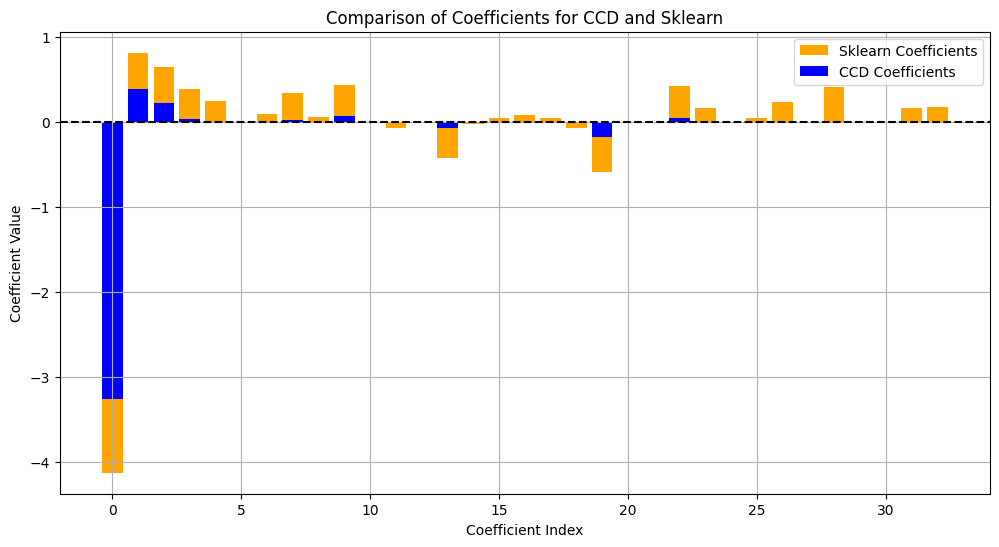

CCD Betas: [-3.25679047  0.37876167  0.22260862  0.02950712  0.          0.
  0.          0.01755931  0.          0.06466088  0.          0.
  0.         -0.07823412  0.          0.          0.          0.
  0.         -0.17618387  0.          0.          0.03957088  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
CCD Intercept: -3.2567904687214426
Sklearn Betas: [-4.122807    0.81045301  0.63688108  0.38458169  0.24562652  0.
  0.08563839  0.33769699  0.05909222  0.43188175 -0.00943674 -0.07724863
  0.         -0.42272375 -0.0218912   0.0450643   0.0830059   0.04951389
 -0.06889924 -0.59465824  0.         -0.01028078  0.41671421  0.16305843
  0.          0.04748888  0.22712583  0.          0.41246059  0.
  0.          0.16358783  0.17832604]
Sklearn Intercept: -4.122807


In [31]:
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD_unbalanced.csv")
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn_unbalanced.csv")
data_n_CCD['beta'] = data_n_CCD['beta'].apply(convert_beta_string_to_list)
data_n_sklearn['Betas'] = data_n_sklearn['Betas'].apply(convert_sklearn_beta_to_list)
data_n_sklearn['Intercept'] = data_n_sklearn['Intercept'].apply(lambda x: float(x.strip('[]')))

data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 0, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 0, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['p'] == 0.05, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['p'] == 0.05, :]

# Get the coefficients for CCD and sklearn
ccd_betas = data_n_CCD['beta'].values[0]
ccd_intercept = data_n_CCD['intercept'].values[0]
ccd_betas = np.concatenate(([ccd_intercept], ccd_betas))
sklearn_betas = data_n_sklearn['Betas'].values[0]
sklearn_intercept = data_n_sklearn['Intercept'].values[0]
sklearn_betas = np.concatenate(([sklearn_intercept], sklearn_betas))


# Create a bar plot for the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sklearn_betas)), sklearn_betas, alpha=1, label='Sklearn Coefficients', color='orange')
plt.bar(range(len(ccd_betas)), ccd_betas, alpha=1, label='CCD Coefficients', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Comparison of Coefficients for CCD and Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()
plt.show()

# Print betas and intercepts
print("CCD Betas:", ccd_betas)
print("CCD Intercept:", ccd_intercept)
print("Sklearn Betas:", sklearn_betas)
print("Sklearn Intercept:", sklearn_intercept)

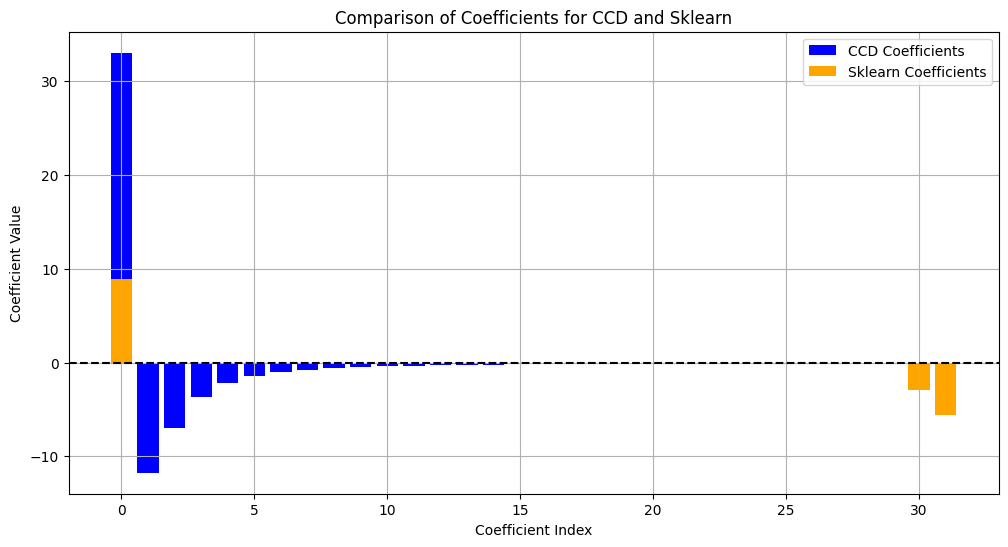

CCD Betas: [33.04340216, -11.75284967, -7.02280545, -3.62764996, -2.2046131, -1.47872185, -1.05967455, -0.79624721, -0.62000873, -0.49636003, -0.40629808, -0.33868144, -0.28663068, -0.24571237, -0.21296663, -0.18635335, -0.16443128, -0.14616119, -0.13077401, -0.11769435, -0.10648303, -0.09679994, -0.08837926, -0.08101194, -0.07452802, -0.06879335, -0.06369537, -0.05914315, -0.05506302, -0.0513895, -0.04807359, -0.04506697]
CCD Intercept: -11.07594726476369
Sklearn Betas: [8.89624957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.88322991, -5.57592443]
Sklearn Intercept: -5.09175255


In [98]:
data_n_CCD = pd.read_csv("results/synthetic_data_results/LogRegCCD/logregCDD_unbalanced.csv")
data_n_sklearn = pd.read_csv("results/synthetic_data_results/LogRegSklearn/logresSklearn_unbalanced.csv")
data_n_CCD['beta'] = data_n_CCD['beta'].apply(convert_beta_string_to_list)
data_n_sklearn['Betas'] = data_n_sklearn['Betas'].apply(convert_sklearn_beta_to_list)
data_n_sklearn['Intercept'] = data_n_sklearn['Intercept'].apply(lambda x: float(x.strip('[]')))

data_n_CCD = data_n_CCD.loc[data_n_CCD['g'] == 1, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['g'] == 1, :]
data_n_CCD = data_n_CCD.loc[data_n_CCD['p'] == 0.05, :]
data_n_sklearn = data_n_sklearn.loc[data_n_sklearn['p'] == 0.05, :]

# Get the coefficients for CCD and sklearn
ccd_betas = data_n_CCD['beta'].values[0]
sklearn_betas = data_n_sklearn['Betas'].values[0]
sklearn_intercept = data_n_sklearn['Intercept'].values[0]
ccd_intercept = data_n_CCD['intercept'].values[0]

# Create a bar plot for the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(ccd_betas)), ccd_betas, alpha=1, label='CCD Coefficients', color='blue')
plt.bar(range(len(sklearn_betas)), sklearn_betas, alpha=1, label='Sklearn Coefficients', color='orange')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Comparison of Coefficients for CCD and Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()
plt.show()

# Print betas and intercepts
print("CCD Betas:", ccd_betas)
print("CCD Intercept:", ccd_intercept)
print("Sklearn Betas:", sklearn_betas)
print("Sklearn Intercept:", sklearn_intercept)